In [46]:
#need to pip install unzip, sklearn, and scikit-image
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3099537515492022800, name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6871695637504600893
 physical_device_desc: "device: XLA_GPU device", name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17721042679499208573
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15864515789
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3456119283302575696
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
from glob import glob
import os
import numpy as np
import pandas as pd
import sklearn
from keras.utils import to_categorical

path_to_train = 'Images'
glob_train_imgs = os.path.join(path_to_train, '*.jpg')

path_to_test = 'face tests'
glob_test_imgs = os.path.join(path_to_test, '*.jpg')

train_img_paths = glob(glob_train_imgs)
test_img_paths = glob(glob_test_imgs)
print(test_img_paths[:10])

raw = pd.read_csv('imgavg_exp.csv', names=["Image","Rating"])
ratings_dict = {}
ratings = raw.values
y_values = []
for element in ratings:
    y_values.append(element[1])
    
y_values = to_categorical(y_values)

for i in range(len(ratings)):
    
    ratings_dict[ratings[i][0]] = y_values[i]



In [136]:
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

# This will be useful so we can construct the corresponding mask
def get_img_id(img_path):
    img_basename = os.path.basename(img_path)
    return img_basename

# Write it like a normal function
def image_gen(img_paths, img_size=(512, 512)):
    # Iterate over all the image paths
    for img_path in img_paths:
        
        #get rating
        img_basename = get_img_id(img_path)
        
        rating = ratings_dict[img_basename]
        
        # Load the image and mask, and normalize it to 0-1 range
        img = imread(img_path) #/ 255.
        
        # Resize the images
        #img = resize(img, img_size, preserve_range=True)

        # Yield the image mask pair
        yield img, rating
        


Images/AM1724.jpg


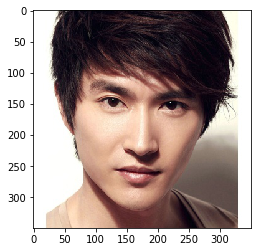

[ 0.  0.  0.  0.  1.  0.]
Images/AM653.jpg


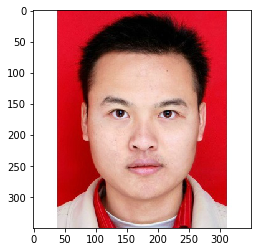

[ 0.  0.  0.  1.  0.  0.]
Images/AF1058.jpg


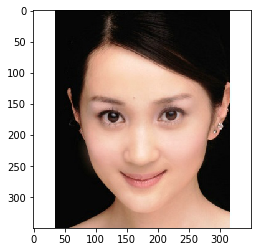

[ 0.  0.  0.  0.  1.  0.]
Images/AF1663.jpg


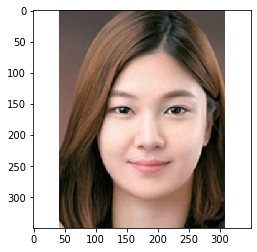

[ 0.  0.  0.  0.  1.  0.]
Images/AF1783.jpg


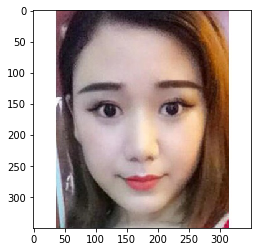

[ 0.  0.  0.  0.  1.  0.]
Images/AM1803.jpg


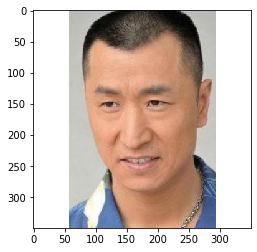

[ 0.  0.  0.  1.  0.  0.]
Images/AF1456.jpg


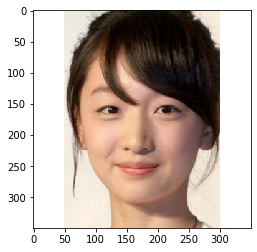

[ 0.  0.  0.  0.  1.  0.]
Images/AF1427.jpg


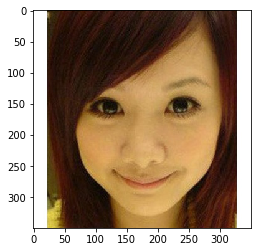

[ 0.  0.  0.  0.  1.  0.]
Images/AM735.jpg


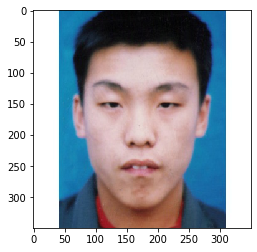

[ 0.  0.  1.  0.  0.  0.]
Images/AM1553.jpg


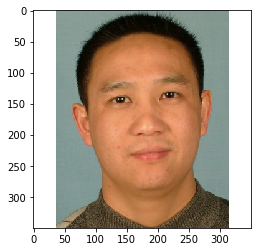

[ 0.  0.  0.  1.  0.  0.]
Images/AF550.jpg


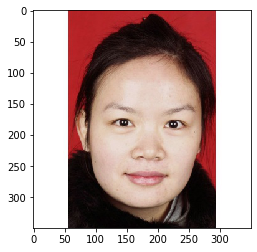

[ 0.  0.  0.  1.  0.  0.]
Images/AF645.jpg


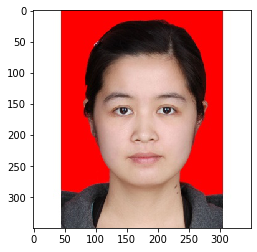

[ 0.  0.  0.  1.  0.  0.]
Images/CM6.jpg


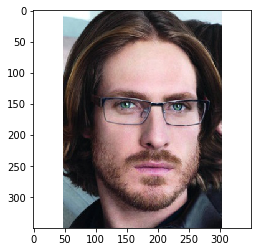

[ 0.  0.  0.  0.  1.  0.]
Images/AM1786.jpg


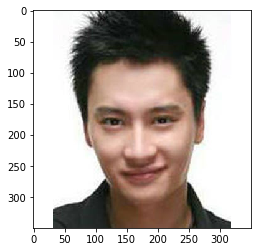

[ 0.  0.  0.  0.  1.  0.]
Images/AF1070.jpg


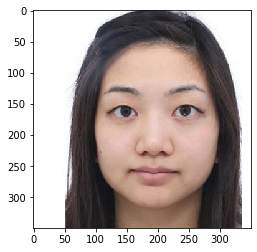

[ 0.  0.  1.  0.  0.  0.]


In [131]:
import matplotlib.pyplot as plt
ig = image_gen(train_img_paths)
for i in range(15):

    first_img, first_rating = next(ig)
    print (train_img_paths[i])
    plt.imshow(first_img.astype(int))
    plt.show()
    print (first_rating)

In [101]:
#compute average image

average = np.empty((350,350,3))
for i in range(len(train_img_paths)):
    img = imread(train_img_paths[i])
    average = np.add(average, img)
avg = average/5500

In [102]:
print (avg)

[[[ 254.92618182  254.92963636  254.91218182]
  [ 254.86545455  254.87345455  254.866     ]
  [ 254.87327273  254.88818182  254.87418182]
  ..., 
  [ 254.81472727  254.82690909  254.79363636]
  [ 254.89490909  254.90527273  254.88363636]
  [ 254.90709091  254.91236364  254.89854545]]

 [[ 254.92636364  254.93072727  254.91290909]
  [ 254.86981818  254.88        254.87018182]
  [ 254.878       254.89436364  254.87963636]
  ..., 
  [ 254.81127273  254.82381818  254.79163636]
  [ 254.89381818  254.90509091  254.88381818]
  [ 254.90672727  254.91272727  254.89963636]]

 [[ 254.92254545  254.93054545  254.91254545]
  [ 254.87145455  254.88454545  254.87490909]
  [ 254.87781818  254.89727273  254.88127273]
  ..., 
  [ 254.79509091  254.80927273  254.77727273]
  [ 254.88036364  254.89345455  254.87290909]
  [ 254.89363636  254.90272727  254.88818182]]

 ..., 
 [[ 254.88054545  254.88818182  254.86909091]
  [ 254.808       254.81145455  254.79618182]
  [ 254.76472727  254.76709091  254.7398181

In [103]:
#compute standard deviation image

sd = np.empty((350,350,3))
for i in range(len(train_img_paths)):
    img = imread(train_img_paths[i])
    a = np.subtract(img, avg)
    a = np.square(a)
    sd = np.add(sd, a)
sd = sd/5500
sd = np.sqrt(sd)

In [104]:
print (sd)

[[[ 2.65843528  2.814242    3.07206131]
  [ 4.4958655   4.26010665  4.38984589]
  [ 4.11232171  3.76749543  3.86865746]
  ..., 
  [ 5.50525405  5.17286705  5.48952011]
  [ 3.77282514  3.22096971  3.35316434]
  [ 3.58528382  3.15884535  3.18674205]]

 [[ 2.65720645  2.81636574  3.07932095]
  [ 4.328671    4.09974899  4.23681227]
  [ 3.96287352  3.63924367  3.75328217]
  ..., 
  [ 5.59780659  5.2869153   5.59727218]
  [ 3.73331156  3.22330611  3.38278109]
  [ 3.52554465  3.13157009  3.18426526]]

 [[ 2.66307843  2.80448987  3.07724336]
  [ 4.1732697   3.96242742  4.07423863]
  [ 3.89518985  3.56915718  3.67364947]
  ..., 
  [ 5.80176874  5.4719406   5.7813955 ]
  [ 3.88437803  3.36372245  3.53956947]
  [ 3.66183439  3.22822388  3.33426072]]

 ..., 
 [[ 4.18871642  4.10598499  4.34282301]
  [ 5.83282336  5.80467351  6.00074717]
  [ 6.62713872  6.60348958  6.82193547]
  ..., 
  [ 6.62394768  6.48622556  6.79979276]
  [ 4.76390055  4.43733328  4.6825455 ]
  [ 4.74396037  4.39795531  4.58370

In [105]:
import numpy as np

# Keras takes its input in batches 
# (i.e. a batch size of 32 would correspond to 32 images and 32 masks from the generator)
# The generator should run forever
def image_batch_generator(img_paths, batchsize=32):
    while True:
        ig = image_gen(img_paths)
        batch_img, batch_rating = [], []
        
        for img, rating in ig:
            # Add the image and mask to the batch
            img = np.divide((img - avg),sd) #0 mean, 1 var
            batch_img.append(img)
            batch_rating.append(rating)
            # If we've reached our batchsize, yield the batch and reset
            if len(batch_img) == batchsize:
                yield np.stack(batch_img, axis=0), np.stack(batch_rating, axis=0)
                batch_img, batch_rating = [], []

In [106]:
#model
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Reshape
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Dropout,MaxPooling2D
from keras.models import Sequential
from keras.layers import Layer, ZeroPadding2D, UpSampling2D
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(350, 350, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer=Adam(lr=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 350, 350, 32)      896       
_________________________________________________________________
batch_normalization_53 (Batc (None, 350, 350, 32)      128       
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 350, 350, 32)      9248      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 175, 175, 32)      0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 175, 175, 64)      18496     
_________________________________________________________________
batch_normalization_54 (Batc (None, 175, 175, 64)      256       
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 175, 175, 64)      36928     
__________

In [107]:
from sklearn.model_selection import train_test_split
import keras.callbacks
BATCHSIZE = 10

# Split the data into a train and validation set
train_img_paths, val_img_paths = train_test_split(train_img_paths, test_size=0.15)

# Create the train and validation generators
traingen = image_batch_generator(train_img_paths, batchsize=BATCHSIZE)
valgen = image_batch_generator(val_img_paths, batchsize=BATCHSIZE)

def calc_steps(data_len, batchsize):
    return (data_len + batchsize - 1) // batchsize

# Calculate the steps per epoch
train_steps = calc_steps(len(train_img_paths), BATCHSIZE)
val_steps = calc_steps(len(val_img_paths), BATCHSIZE)

filepath="attractiveness.hdf5"

checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=False, save_weights_only=True, mode='auto', period=1)
callbacks_list = [checkpoint]
# Train the model
history = model.fit_generator(
    traingen, 
    steps_per_epoch=train_steps, 
    epochs= 20, # Change this to a larger number to train for longer
    validation_data=valgen, 
    validation_steps=val_steps, 
    verbose=1,
    max_queue_size=5, # Change this number based on memory restrictions
    callbacks = callbacks_list 
)

Epoch 1/20
468/468 [==============================] - 53s 113ms/step - loss: 1.3404 - acc: 0.4066 - val_loss: 0.9951 - val_acc: 0.5458
Epoch 2/20
468/468 [==============================] - 53s 113ms/step - loss: 1.0428 - acc: 0.5124 - val_loss: 0.8915 - val_acc: 0.6072
Epoch 3/20
468/468 [==============================] - 53s 113ms/step - loss: 0.9741 - acc: 0.5509 - val_loss: 0.8316 - val_acc: 0.6373
Epoch 4/20
468/468 [==============================] - 53s 112ms/step - loss: 0.9060 - acc: 0.5744 - val_loss: 0.8938 - val_acc: 0.5988
Epoch 5/20
468/468 [==============================] - 53s 112ms/step - loss: 0.8621 - acc: 0.6100 - val_loss: 0.7908 - val_acc: 0.6651
Epoch 6/20
468/468 [==============================] - 53s 113ms/step - loss: 0.8096 - acc: 0.6331 - val_loss: 0.9009 - val_acc: 0.5614
Epoch 7/20
468/468 [==============================] - 53s 112ms/step - loss: 0.7782 - acc: 0.6404 - val_loss: 0.7951 - val_acc: 0.6325
Epoch 8/20
468/468 [==============================] - 5

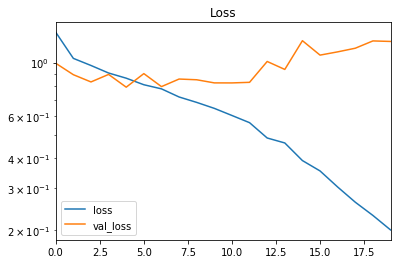

In [114]:
import pandas as pd
%matplotlib inline

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(title="Loss", logy=True)
#pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(title="Accuracy")

['face tests/Liverpool-News-Mohamed-Salah-852988.jpg', 'face tests/b542c7df4f919a4f0a87bca4778f83ec.jpg', 'face tests/074c0ea56b80ee9cd06b62fb0ac47cbb.jpg', 'face tests/5d7b56eae7.jpg', 'face tests/yogalin-TM-photo1.jpg', 'face tests/download.jpg', 'face tests/250057680.jpg', 'face tests/Peng-Profile-1.jpg', 'face tests/4360-1540568808.jpg', 'face tests/4ffce78bd05c76e4a78b3b2a0b6a4900.jpg', 'face tests/diego-costa.jpg', 'face tests/Iker-Casillas-1345556317.jpg']


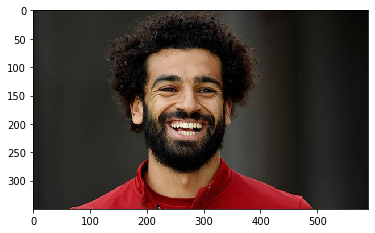

4


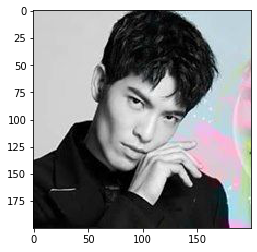

4


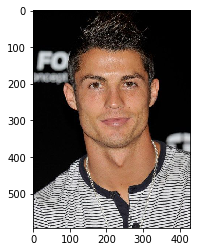

4


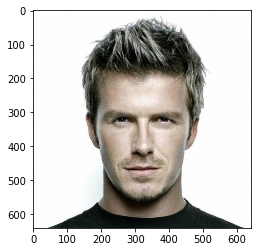

4


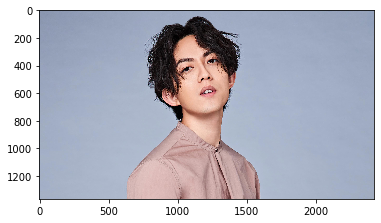

4


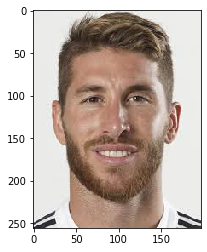

4


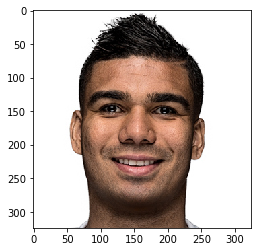

3


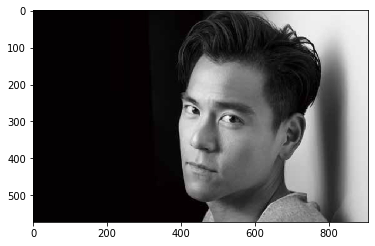

4


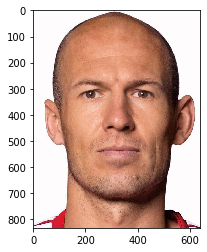

3


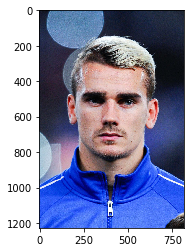

4


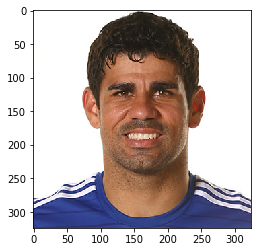

3


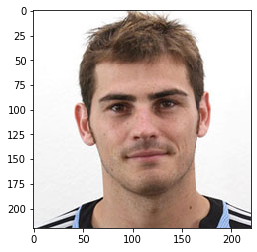

3


In [141]:
#prediction
def generate_predictions(img_path):
    img = imread(img_path)
    img = resize(img, (350,350), preserve_range=True).astype(int)
    img = np.divide((img - avg),sd) #0 mean, 1 var
    y = model.predict(img.reshape(1,350,350,3))  
    return np.argmax(y)


#imgs = ['Images/AF1802.jpg', 'Images/AM247.jpg', 'Images/AM1161.jpg', 'Images/AF893.jpg', 'Images/AM1028.jpg']

imgs = test_img_paths
print (imgs)
for image_path in imgs:
    image = imread(image_path)
    plt.imshow(image.astype(int))
    plt.show()
    print(generate_predictions(image_path))
    